In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import datetime as dt
import pandas_datareader.data as web
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def get_data(lusip):
    start = dt.datetime(2018, 1, 1)
    end = dt.datetime.now()
    df = web.DataReader(lusip,'yahoo', start, end)
    df.to_csv(lusip+'.csv')

In [ ]:
get_data('RELIANCE.NS')

In [ ]:

pd.read_csv('RELIANCE.NS.csv').shape

(853, 7)

In [ ]:
def data_preprocessing(ticker):
    training_data = pd.read_csv('{}.csv'.format(ticker))
    training_data = training_data.dropna()
    training_data = training_data[['Open', 'High', 'Low', 'Date', 'Volume', 'Adj Close','Close']]

    training_data['H-L'] = training_data['High'] - training_data['Low']
    training_data['O-C'] = training_data['Close'] - training_data['Open']
    
    training_data['ma_5'] = training_data['Close'].rolling(window=5).mean()
    training_data['ma_10'] = training_data['Close'].rolling(window=10).mean() 
    
    training_data['EWMA_12'] = training_data['Close'].ewm(span=12).mean() #Providing exponential weighted (EW) functions #Specify decay

    training_data['std_5'] = training_data['Close'].rolling(window=5).std()
    training_data['std_10'] = training_data['Close'].rolling(window=10).std()


    training_data[["year","month", "day",]] = training_data["Date"].str.split("-", expand = True)
    training_data = training_data.drop(['Date'], axis = 1)
    training_data.day = training_data.day.astype('int64')
    training_data.month = training_data.month.astype('int64')
    training_data.year = training_data.year.astype('int64')

    training_data['Price_Rise'] = np.where(training_data['Close'].shift(-1) > training_data['Close'], 1, 0)
    training_data.columns
    training_data = training_data.dropna()
    y = training_data['Price_Rise']
    training_data = training_data.drop(['Price_Rise'], axis = 1)
    X = training_data
    split = int(len(training_data)*0.8)
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test, y_train, y_test


In [ ]:
data_preprocessing('RELIANCE.NS')

(array([[-1.12330789, -1.12951557, -1.1021744 , ..., -1.17610457,
         -1.58272505, -0.44222137],
        [-1.10298068, -1.11317224, -1.08169631, ..., -1.17610457,
         -1.58272505, -0.09924999],
        [-1.10965974, -1.14413856, -1.15594752, ..., -1.17610457,
         -1.58272505,  0.0150738 ],
        ...,
        [ 2.69003727,  2.65971263,  2.72784936, ...,  1.32821904,
          1.15973207, -0.78519276],
        [ 2.69003727,  2.6676723 ,  2.75506488, ...,  1.32821904,
          1.15973207, -0.44222137],
        [ 2.67713933,  2.75450507,  2.75387541, ...,  1.32821904,
          1.15973207, -0.32789758]]),
 array([[ 2.8187261 ,  2.80732834,  2.88073351, ...,  1.32821904,
          1.15973207, -0.21357378],
        [ 2.8512651 ,  2.76680638,  2.66211471, ...,  1.32821904,
          1.15973207, -0.09924999],
        [ 2.63140897,  2.6003769 ,  2.59563646, ...,  1.32821904,
          1.15973207,  0.0150738 ],
        ...,
        [ 2.58743774,  2.60761296,  2.6172009 , ...,  

accuracy: 0.4911242603550296
predicted class counts: Counter({0: 113, 1: 56})


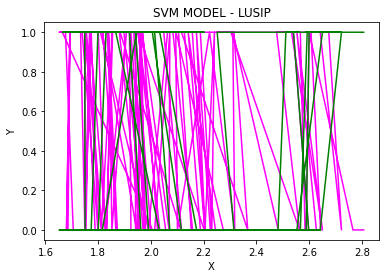

In [ ]:

def svm_linear(ticker):
  X_train, X_test, y_train, y_test = data_preprocessing(ticker)
  clf = svm.SVC(kernel = 'linear')
  clf.fit(X_train, y_train)
  confidence = clf.score(X_test, y_test)
  print('accuracy:',confidence)
  predictions = clf.predict(X_test)
  print('predicted class counts:',Counter(predictions))


  plt.plot(X_test[:,1], y_test, color = 'magenta')
  plt.plot(X_test[:,1], predictions, color = 'green')
  plt.title('SVM MODEL - LUSIP')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

svm_linear('RELIANCE.NS')


In [ ]:
def svm_poly(ticker):
    X_train, X_test, y_train, y_test = data_preprocessing(ticker)
    clf = svm.SVC(kernel = 'poly')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    
svm_poly('RELIANCE.NS')

accuracy: 0.46745562130177515
predicted class counts: Counter({0: 87, 1: 82})


In [ ]:
from sklearn.model_selection import train_test_split
def data_preprocessing_RF(ticker):
    training_data = pd.read_csv('{}.csv'.format(ticker))
    training_data = training_data.dropna()
    training_data = training_data[['Open', 'High', 'Low', 'Date', 'Volume', 'Adj Close','Close']]

    #training_data['H-L'] = training_data['High'] - training_data['Low']
    #training_data['O-C'] = training_data['Close'] - training_data['Open']
    
    #training_data['ma_5'] = training_data['Close'].rolling(window=5).mean()
    #training_data['ma_10'] = training_data['Close'].rolling(window=10).mean() 
    
    #training_data['EWMA_12'] = training_data['Close'].ewm(span=12).mean() #Providing exponential weighted (EW) functions #Specify decay

    #training_data['std_5'] = training_data['Close'].rolling(window=5).std()
    #training_data['std_10'] = training_data['Close'].rolling(window=10).std()


    training_data[["year","month", "day",]] = training_data["Date"].str.split("-", expand = True)
    training_data = training_data.drop(['Date'], axis = 1)
    training_data.day = training_data.day.astype('int64')
    training_data.month = training_data.month.astype('int64')
    training_data.year = training_data.year.astype('int64')

    #training_data['Price_Rise'] = np.where(training_data['Close'].shift(-1) > training_data['Close'], 1, 0)
    training_data = training_data.dropna()
    target = training_data['Close']
    training_data = training_data.drop(['Close'], axis = 1)
    X = training_data
    feature_list = list(training_data.columns) 
    X = np.array(X)
    y = np.array(target)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


    return training_data,target, X_train, X_test, y_train, y_test, feature_list


In [ ]:
features, labels, train_features, test_features, train_labels, test_labels,feature_list = data_preprocessing_RF('RELIANCE.NS')
features.describe()

,Open,High,Low,Volume,Adj Close,year,month,day
count,853.000000,853.000000,853.000000,8.530000e+02,853.000000,853.000000,853.000000,853.000000
mean,1453.605930,1471.396612,1434.319976,1.151725e+07,1440.667326,2019.274326,6.075029,15.669402
std,420.618074,425.248589,414.402677,8.047628e+06,422.547202,1.023095,3.442212,8.752382
min,868.764954,887.437988,862.821289,1.296168e+06,858.272034,2018.000000,1.000000,1.000000
25%,1115.922119,1128.304810,1099.676147,6.560005e+06,1103.987549,2018.000000,3.000000,8.000000
50%,1324.445557,1341.087769,1308.595825,9.102492e+06,1304.983643,2019.000000,6.000000,16.000000
75%,1924.000000,1940.599976,1899.900024,1.376484e+07,1910.852905,2020.000000,9.000000,23.000000
max,2325.000000,2369.350098,2310.550049,6.584835e+07,2317.096191,2021.000000,12.000000,31.000000


In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [ ]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.96 degrees.


In [ ]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.78 %.


In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Adj Close            Importance: 0.47
Variable: High                 Importance: 0.31
Variable: Low                  Importance: 0.17
Variable: Open                 Importance: 0.05
Variable: Volume               Importance: 0.0
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0


In [ ]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('High'), feature_list.index('Adj Close'), feature_list.index('Low')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.67 degrees.
Accuracy: 99.8 %.


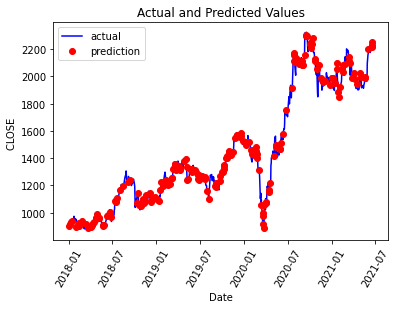

In [ ]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of predictions
months = features['month']
days = features['day']
years = features['year']
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('CLOSE '); plt.title('Actual and Predicted Values');